### CS156 Assignment 5: Density Estimation
_Yoav Rabinovich, November 2018_

------------

For the purposes of this assignment I wrote a density estimation function that performs grid search cross validation to find the best estimator from a variety of kernels and bandwidths, and plots the data. I fed it transaction counts by month and by day of the month, as well as transaction size, to construct density estimations. I then sample a fraudulent month of transactions, by sampling a count for monthly transactions, then sampling this many day tags from our day of the month distribution, and then sampling from our size distribution for each transaction.

However, the assignment instructions left out a crucial step. As it is, we're not creating a distribution of transaction size based on the day of the month. This makes the second stage quite useless, since the information we gather from sampling days of the month isn't utilized, and we might as well have drawn transaction sizes in the amount we drew from our monthly distribution. This is a flaw that will be utilized by fraud researchers to take us down. There might be other correlations we haven't taken into consideration, for example transaction size and month of the year, since for example we buy more presents around christmas. Each such possible causal information is a tool that can be used against us, so I would refrain for using this particular model for my personal real life attempts at tax fraud.

However, our Benford analysis does show a striking proximity between our data and a true Benford distribution, which means our estimators managed to capture that feature of real life transactions, and probably others we haven't explicitly addressed.

In [431]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors.kde import KernelDensity
from sklearn.model_selection import GridSearchCV

In [348]:
# Read data
data = pd.read_csv("anonymized.csv")
data.Date=pd.to_datetime(data.Date,infer_datetime_format=True)

In [419]:

"""
Plotting adapted from:
https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html
"""

def density(data,title=None,resolution=1000,
            kernels=['gaussian', 'tophat', 'epanechnikov',"exponential"]):
    
    data = data.values[:,np.newaxis]
    
    minval = np.min(data)
    maxval = np.max(data)
    buffer = maxval*0.2

    X_plot = np.linspace(minval-buffer, maxval+buffer, resolution)[:, np.newaxis]
    fig, ax = plt.subplots()
    
    maxpoint=0
    best_est=None
    best_score=0
    
    for kernel in kernels:
        grid = GridSearchCV(KernelDensity(kernel=kernel),
                  {'bandwidth': np.logspace(-1, 5, 20)},
                    cv=3)
        grid.fit(data)
        kde = grid.best_estimator_
        log_dens = kde.score_samples(X_plot)
        ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
                label="kernel = '{0}'".format(kernel))
        if max(np.exp(log_dens))> maxpoint: maxpoint=max(np.exp(log_dens))
        if (best_est == None)or(best_score < grid.best_score_):
            best_est = kde
            best_score = grid.best_score_

    plt.title(title)
    ax.legend(loc='upper right')
    scatterpos = 0-maxpoint*0.05
    scatterscatter= maxpoint*0.02
    ax.plot(data[:, 0], 
            scatterpos - scatterscatter * np.random.random(data.shape[0]), 
            '.k')

    ax.set_xlim(minval-buffer, maxval+buffer)
    ax.set_ylim(scatterpos*2, maxpoint*1.1)
    plt.show()
    return best_est

C:\Users\rabin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\rabin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\rabin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:791: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\rabin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will

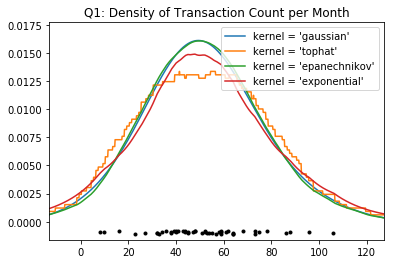

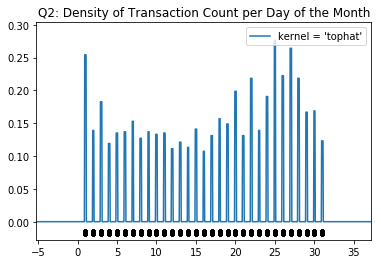

C:\Users\rabin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\rabin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:791: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\rabin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:791: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\rabin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


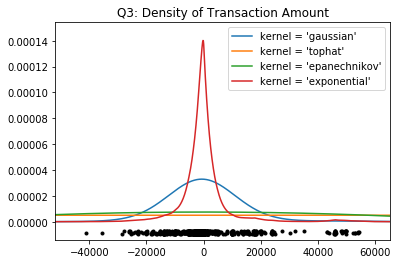

In [421]:
# Prepare our datasets
monthly = data['Date'].groupby([data.Date.dt.year, data.Date.dt.month]).agg('count')
daily = data['Date'].dt.day
amountwise = data['Amount']

# Perform density estimation
monthly_estimator=density(monthly,"Q1: Density of Transaction Count per Month")
# Notice that the daily distribution is a simple discrete multinomial distribution,
# so no fancy interpolation is required.
daily_estimator=density(daily,"Q2: Density of Transaction Count per Day of the Month",
                        kernels=["tophat"])
amountwise_estimator=density(amountwise,"Q3: Density of Transaction Amount")

#The deprecation warnings were unavoidable
# since they're incurred from within the GridSearchCV method

C:\Users\rabin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\rabin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\rabin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:791: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


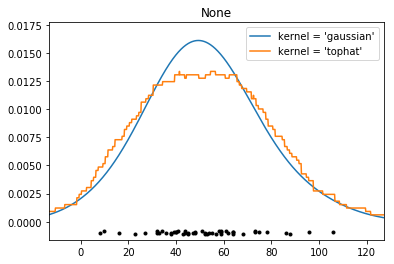

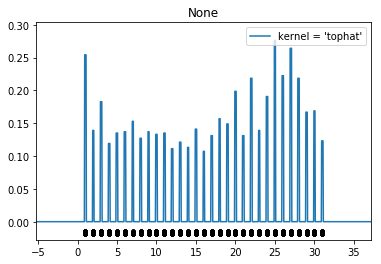

C:\Users\rabin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\rabin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:791: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


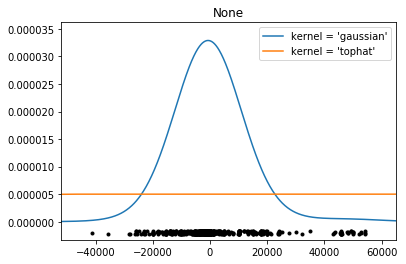

In [422]:
# Producing a fraudulent sample month of transactions
# Forcing Gaussian and Tophat,
# since other kernels aren't supported by the sampling function
monthly_estimator=density(monthly,kernels=["gaussian","tophat"]);
daily_estimator=density(daily,kernels=["tophat"]);
amountwise_estimator=density(amountwise,kernels=["gaussian","tophat"]);

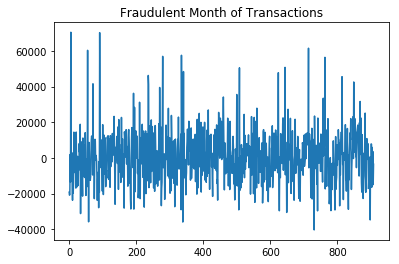

In [485]:
# Drawing a monthly count
new_monthly = np.round(monthly_estimator.sample(1)).astype(int)
# Drawing day tags
new_daily = np.round(daily_estimator.sample(new_monthly[0][0])).astype(int)
# Drawing transaction sizes
new_amounts = np.around(amountwise_estimator.sample(sum(new_daily)),decimals=2)

plt.title("Fraudulent Month of Transactions")
plt.plot(new_amounts)

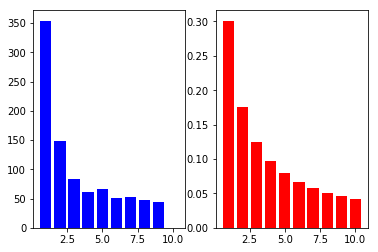

In [499]:
# Checking for conformity with Benford's law

benford = np.zeros(10)

for trans in new_amounts:
    first_digit=int(str(abs(trans))[1])
    benford[first_digit-1]+=1

index = range(1,11)
true = [np.log10(1 + (1.0 / d)) for d in index]
plt.subplot(1,2,1)
plt.bar(index,benford,color='b')
plt.subplot(1,2,2)
plt.bar(index,true,color='r')
plt.show()